In [6]:
import gym
import numpy as np
import random

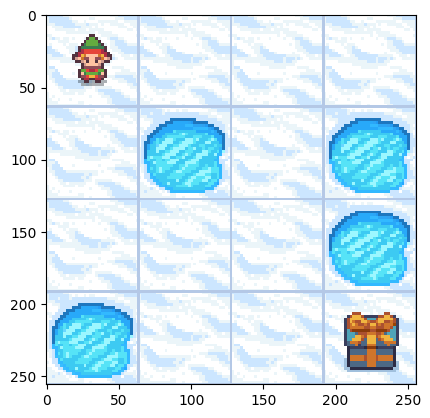

In [7]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode="rgb_array")
env.reset()

from matplotlib import pyplot as plt

plt.imshow(env.render(), interpolation='nearest')
plt.show()

In [8]:
state = env.reset()
state[0]

0

# part B

In [9]:
total_epochs, total_penalties = 0, 0
episodes = 1000
wins = 0

for _ in range(episodes):
    state = env.reset()
    state = state[0]
    epochs, penalties, reward = 0, 0, 0

    done = False

    while not done:
        action = action = env.action_space.sample()
        state, reward, done, info, _ = env.step(action)

        if reward > 0:
            wins += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"number of wins: {wins}")

Results after 1000 episodes:
number of wins: 19


# part C & D

## is_slippery = False

In [10]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")
env.reset()

(0, {'prob': 1})

In [11]:
from IPython.display import clear_output

In [12]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyper parameters
alpha = 0.1
gamma = 0.6
epsilon = 0.3

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100000):
    state = env.reset()
    state = state[0]
    epochs, penalties, reward, = 0, 0, 0
    done = False
    wins = 0
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state])  # Exploit learned values

        next_state, reward, done, info, _ = env.step(action)

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == 1:
            wins += 1

        state = next_state
        epochs += 1

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
clear_output(wait=True)
print("Training finished.\n")

Training finished.



In [13]:
q_table

array([[0.046656  , 0.07776   , 0.07776   , 0.046656  ],
       [0.046656  , 0.        , 0.1296    , 0.07776   ],
       [0.07776   , 0.216     , 0.07776   , 0.1296    ],
       [0.1296    , 0.        , 0.07769959, 0.07742068],
       [0.07776   , 0.1296    , 0.        , 0.046656  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.36      , 0.        , 0.1296    ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.1296    , 0.        , 0.216     , 0.07776   ],
       [0.1296    , 0.36      , 0.36      , 0.        ],
       [0.216     , 0.6       , 0.        , 0.216     ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.36      , 0.6       , 0.216     ],
       [0.36      , 0.6       , 1.        , 0.36      ],
       [0.        , 0.        , 0.        , 0.        ]])

In [14]:
for i in range(q_table.shape[0]):
    if np.sum(q_table[i, :]) == 0:
        print(f'state {i}: Endpoint')
        continue
    print(f'state {i}: {np.argmax(q_table[i])}')

state 0: 1
state 1: 2
state 2: 1
state 3: 0
state 4: 1
state 5: Endpoint
state 6: 1
state 7: Endpoint
state 8: 2
state 9: 1
state 10: 1
state 11: Endpoint
state 12: Endpoint
state 13: 2
state 14: 2
state 15: Endpoint


In [15]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 1000
wins = 0

for _ in range(episodes):
    state = env.reset()
    state = state[0]
    epochs, penalties, reward = 0, 0, 0

    done = False

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info, _ = env.step(action)

        if reward > 0:
            wins += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"number of wins: {wins}")

Results after 1000 episodes:
number of wins: 1000


## is_slippery = True

In [16]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode="rgb_array")
env.reset()
from IPython.display import clear_output

q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyper parameters
alpha = 0.2
gamma = 0.95
epsilon = 0.2

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100000):
    state = env.reset()
    state = state[0]
    epochs, penalties, reward, = 0, 0, 0
    done = False
    wins = 0
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state])  # Exploit learned values

        next_state, reward, done, info, _ = env.step(action)

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == 1:
            wins += 1

        state = next_state
        epochs += 1

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
clear_output(wait=True)
print("Training finished.\n")

Training finished.



In [17]:
q_table

array([[0.16672302, 0.16235994, 0.15704817, 0.15478296],
       [0.07829338, 0.05981878, 0.11129949, 0.14958567],
       [0.13733582, 0.13195508, 0.12778428, 0.12832835],
       [0.07072533, 0.10222921, 0.10162166, 0.11973791],
       [0.17636027, 0.16386654, 0.15211647, 0.07216124],
       [0.        , 0.        , 0.        , 0.        ],
       [0.09308701, 0.01330065, 0.08478279, 0.03234985],
       [0.        , 0.        , 0.        , 0.        ],
       [0.14329554, 0.18216119, 0.21420183, 0.26133899],
       [0.24936745, 0.37589953, 0.1927227 , 0.24737908],
       [0.36594553, 0.24579821, 0.31971267, 0.16510233],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.26413391, 0.35214383, 0.5032631 , 0.36569342],
       [0.57825211, 0.75614912, 0.6181038 , 0.60340106],
       [0.        , 0.        , 0.        , 0.        ]])

In [18]:
print("The policy")
for i in range(q_table.shape[0]):
    if np.sum(q_table[i, :]) == 0:
        print(f'state {i}: Endpoint')
        continue
    print(f'state {i}: {np.argmax(q_table[i])}')

The policy
state 0: 0
state 1: 3
state 2: 0
state 3: 3
state 4: 0
state 5: Endpoint
state 6: 0
state 7: Endpoint
state 8: 3
state 9: 1
state 10: 0
state 11: Endpoint
state 12: Endpoint
state 13: 2
state 14: 1
state 15: Endpoint


In [19]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 1000
wins = 0
max_steps = 100

for _ in range(episodes):
    state = env.reset()
    state = state[0]
    epochs, penalties, reward = 0, 0, 0

    done = False

    steps = 0

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info, _ = env.step(action)

        if reward > 0:
            wins += 1

        epochs += 1

        steps += 1

        if steps > max_steps:
            done = True

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"number of wins: {wins}")

Results after 1000 episodes:
number of wins: 736


# part F

In [148]:
"""Evaluate agent's performance after Q-learning"""


def image_array_of_A_win():
    total_epochs, total_penalties = 0, 0
    episodes = 1000
    wins = 0
    max_steps = 100
    success_images = []

    for _ in range(episodes):
        state = env.reset()

        success_images = [env.render()]

        state = state[0]
        epochs, penalties, reward = 0, 0, 0

        done = False

        steps = 0

        while not done:
            action = np.argmax(q_table[state])
            state, reward, done, info, _ = env.step(action)

            success_images.append(env.render())
            if reward > 0:
                wins += 1
                return success_images

            epochs += 1

            steps += 1

            if steps > max_steps:
                done = True

        total_penalties += penalties
        total_epochs += epochs


In [150]:
images = image_array_of_A_win()

In [152]:
len(images)

7

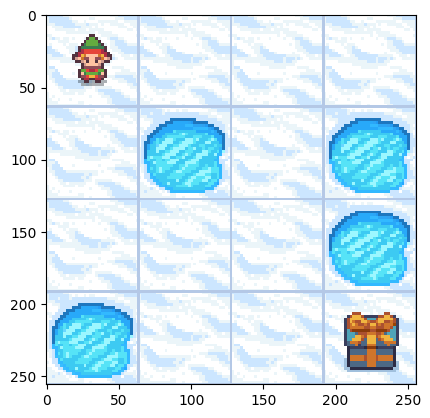

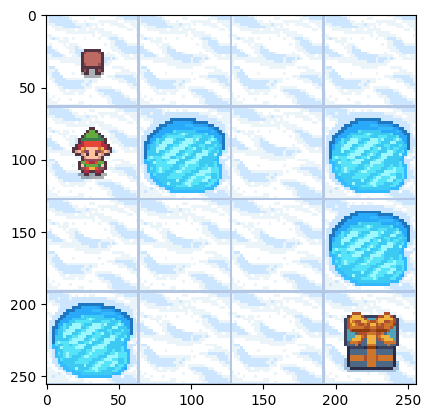

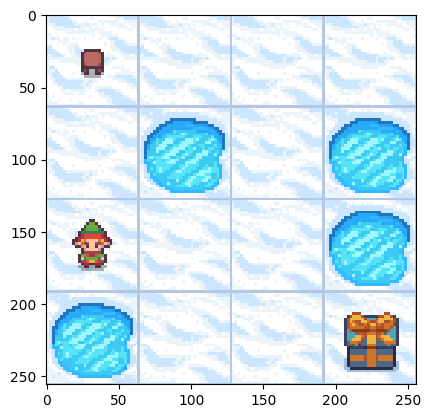

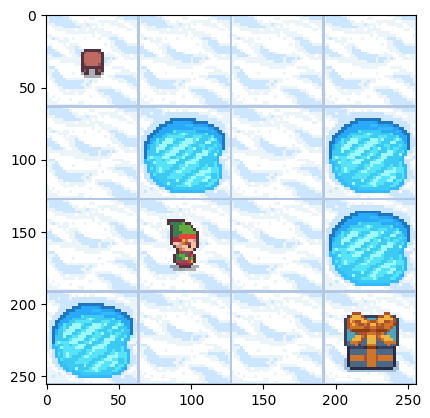

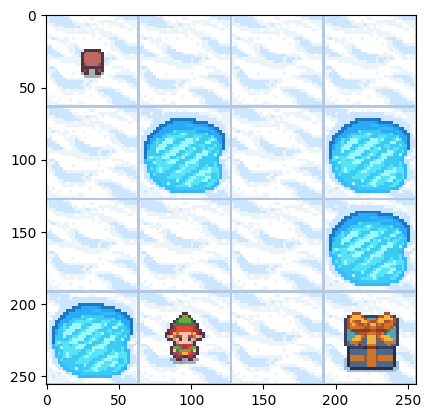

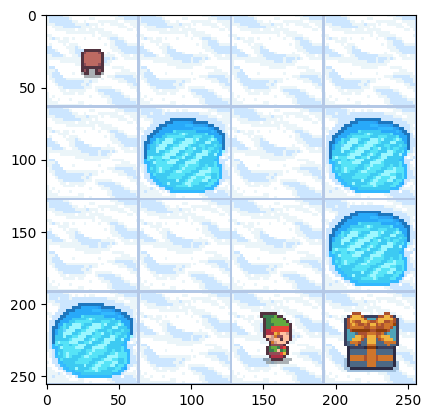

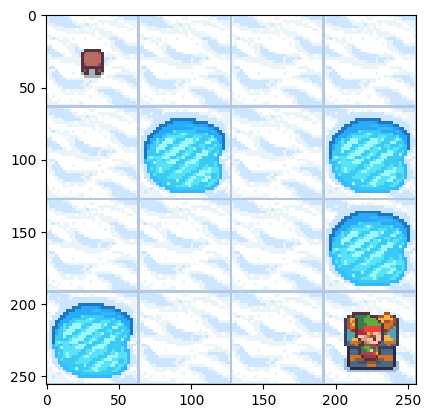

In [153]:
for image in images:
    plt.imshow(image, interpolation='nearest')
    plt.show()